<a href="https://colab.research.google.com/github/dangoldmann/TP-Netflix/blob/main/TP_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Práctico Netflix**
### *Septiembre 2022*

Descargar el archivo que contiene el historial de Netflix. Pueden descargar el suyo propio entrando a este link. A resolver de a grupos de 2 o 3 integrantes.

Ignorar los siguientes dispositivos: 'Sony PS4', 'Netflix Windows App - Cadmium Windows Mobile', 'Apple iPhone 6s', 'Apple iPhone 7 Plus (CDMA)', 'Chrome PC (Cadmium)', 'Samsung 2015 NT14M DTV Smart TV', 'iPhone 5S GSM', 'Google Chromecast V3 Streaming Stick'.

- Contabilizar el dispositivo con el que más títulos se reprodujeron.
- Encontrar la película con más ocurrencias y la película con mayor duración total.
- Generar un TOP “N” de series vistas y graficar.
 - Por tiempo visto
 - Por ocurrencias
- Visualizar una semana de reproducciones genérica, en función a las reproducciones por día y por horario de todos los años.
Contabilizar la cantidad de títulos vistos por año, graficar su variación a través de los años.
Total de días de todos los títulos reproducidos.

### **Bonus**

- Identificar cuál fue la película de Star Wars más veces vista por duración.
- Utilizando la API de IMDb (u otra):
 - Mostrar el póster de las películas más vistas, y de las series.
 - Encontrar el género de series y el de películas más ocurrente.
- Encontrar la serie que más rápido se terminó de ver.


Formato de entrega: Link a GitHub conteniendo el Ipython Notebook con su output guardado. No se corrigen Notebooks sin output generado ni entregas que no sean links a GitHub directamente. Se va a evaluar formato del Notebook, celdas de texto, prolijidad del código y de los resultados generados.




Importando librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
from datetime import datetime as dt
import seaborn as sns

Guardando el dataframe

In [17]:
df = pd.read_csv("NetflixHistory.csv")

#### Eliminando filas no deseadas del dataframe

Eliminando las visualizaciones de los dispositivos no deseados

In [18]:
dispositivosIgnorados = ["Sony PS4", "Netflix Windows App - Cadmium Windows Mobile", "Apple iPhone 6s", "Apple iPhone 7 Plus (CDMA)", "Chrome PC (Cadmium)", "Samsung 2015 NT14M DTV Smart TV", "iPhone 5S GSM", "Google Chromecast V3 Streaming Stick"]

for i in dispositivosIgnorados:
  df = df[df["Device Type"] != i]

Eliminando los hooks, trailers y recaps

In [19]:
video_types = df.groupby(["Supplemental Video Type"]).size()
video_types

Supplemental Video Type
HOOK              49
RECAP              4
TEASER_TRAILER     3
TRAILER           34
dtype: int64

In [20]:
videoTypesIgnorados = ["HOOK", "RECAP", "TEASER_TRAILER", "TRAILER"]

for i in videoTypesIgnorados:
  df = df[df["Supplemental Video Type"] != i]

Eliminando columnas no utilizadas

In [21]:
columnasIgnoradas = ["Supplemental Video Type", "Attributes", "Country"]

for i in columnasIgnoradas:
  df = df.drop(columns = i)

#### Modificando las columnas

Crear una nueva columna que contenga si la visualización corresponde a una película o una serie

In [22]:
def defineContentType(input):
  if input.count(':') > 1:
    return "Serie"
  else:
    return "Pelicula"

In [23]:
df["Content Type"] = df["Title"].apply(defineContentType)

Cambiando los valores de las duraciones a segundos

In [24]:
def changeDurationToSec(input):
  try:
    horas, minutos, segundos = input.split(':')
    return int(horas) * 60 * 60 + int(minutos) * 60 + int(segundos)
  except:
    return input

In [25]:
df["Duration"] = df["Duration"].apply(changeDurationToSec)

#### Contabilizar el dispositivo con el que más títulos se reprodujeron

In [26]:
dispositivos = df.groupby(["Device Type"]).size()
max_cant = max(dispositivos)
dispositivos = dispositivos.reset_index()

In [27]:
dispositivoMasUtilizado = dispositivos.loc[dispositivos[0]==max_cant]
dispositivoMasUtilizado

,Device Type,0
1,Apple Apple TV 4 Apple TV,3439


#### Encontrar la película con más ocurrencias y la película con mayor duración total

In [28]:
df_peliculas = df[df["Content Type"] == "Pelicula"]

Mayor ocurrencias

In [29]:
peliculas = df_peliculas.groupby(["Title"]).size().reset_index()
peliculas = peliculas.rename(columns={0:"Occurrences"})
max_pelicula = max(peliculas["Occurrences"])
peliMasOcurrida = peliculas.loc[peliculas["Occurrences"]==max_pelicula]
peliMasOcurrida

,Title,Occurrences
42,El código enigma,7
128,Star Wars: El Imperio contraataca,7


Mayor duración

In [30]:
durations = df_peliculas.groupby(['Title', 'Duration']).size().reset_index()
durations = durations.drop(columns=0)
max_duration = max(durations["Duration"])
peliMasDuracion = durations.loc[durations["Duration"] == max_duration]
peliMasDuracion

,Title,Duration
63,El club de la pelea,8411


#### Generar un TOP “N” de series vistas y graficar

Guardando las series en un dataframe

In [31]:
df_series = df[df["Content Type"] == "Serie"]

Simplificando los titulos

In [32]:
def simplifyTitle(input):
  return input.split(':')[0]

df_series["Title"] = df_series["Title"].apply(simplifyTitle)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


##### Por tiempo visto

Guardando en un dataframe los titulos y las horas de reproduccion correspondientes

In [33]:
series_durations = df_series.groupby("Title")[["Duration"]].sum()
series_durations = series_durations.sort_values(by="Duration", ascending = False).reset_index()

Creando un diccionario que contiene como keys el titulo de la series y como valor sus horas de reproducción correspondientes

In [34]:
peli_duracion = {}

cantidadTopTiempo = int(input("De cuantas series desea hacer el top: "))
i = 0
while i < cantidadTopTiempo:
  title = series_durations["Title"][i]
  duration = int(series_durations["Duration"][i] / 3600)
  peli_duracion[title] = duration
  i += 1

De cuantas series desea hacer el top: 5


Creando el grafico basado en el diccionario

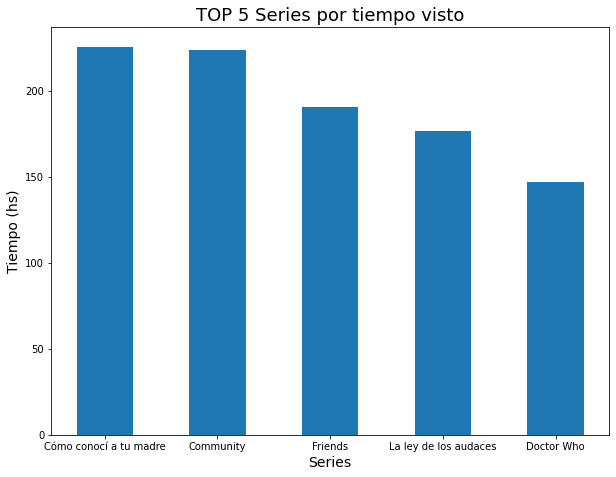

In [35]:
fig = plt.figure(figsize = (cantidadTopTiempo * 2, cantidadTopTiempo * 1.5))
plt.bar(peli_duracion.keys(), peli_duracion.values(), width = 0.5)

plt.xlabel('Series', fontSize=14)
plt.ylabel('Tiempo (hs)', fontSize=14)

plt.title("TOP " + str(cantidadTopTiempo) + " Series por tiempo visto", fontSize = 18)
plt.show()

##### Por ocurrencias

Guardando en un dataframe los titulos y las ocurrencias de cada serie

In [36]:
series_occurrences = df_series.groupby(["Title"]).size().reset_index()
series_occurrences = series_occurrences.rename(columns = {0:"Occurrences"})
series_occurrences = series_occurrences.sort_values(by = "Occurrences", ascending = False).reset_index()

Creando un diccionario que contiene como keys los titulos de las peliculas y como valores su numero de ocurrencias correspondiente

In [37]:
peli_ocurrencia = {}

cantidadTopOcurrencias = int(input("De cuantas series desea hacer el top: "))
i = 0
while i < cantidadTopOcurrencias:
  title = series_occurrences["Title"][i]
  occurrences = series_occurrences["Occurrences"][i]
  peli_ocurrencia[title] = occurrences
  i += 1

De cuantas series desea hacer el top: 5


Creando un grafico basado en el diccionario

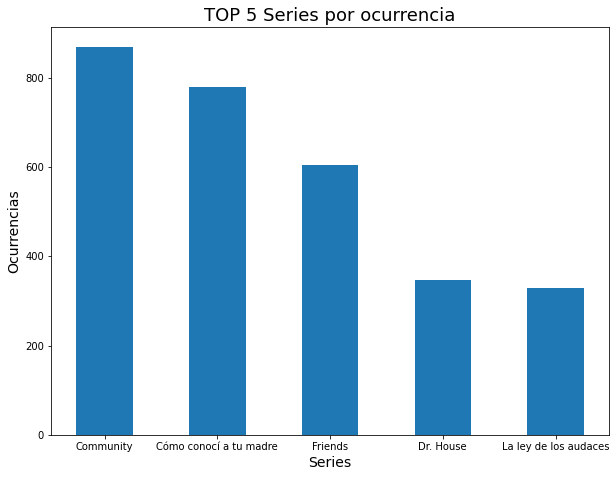

In [38]:
fig = plt.figure(figsize = (cantidadTopOcurrencias * 2, cantidadTopOcurrencias * 1.5))
plt.bar(peli_ocurrencia.keys(), peli_ocurrencia.values(), width = 0.5)

plt.xlabel('Series', fontSize=14)
plt.ylabel('Ocurrencias', fontSize=14)

plt.title("TOP " + str(cantidadTopOcurrencias) + " Series por ocurrencia", fontSize = 18)
plt.show()

#### Visualizar una semana de reproducciones genérica, en función a las reproducciones por día y por horario de todos los años.

Creando las funciones que reciben una fecha y devuelven o el año o el mes o el día o la hora

In [71]:
def getDateTime(input):
  date = dt.strptime(input, '%Y-%m-%d %H:%M:%S')
  date = (date.strftime("%Y-%B-%A-%d %H:%M:%S"))
  res = ""

  for a in date:
    if a == "-" or a == " " or a == ":":
      res += "."
    else: 
      res += a

  return res.split(".")

def defineYearColumn(input):
  res = getDateTime(input)
  return res[0]

def defineMonthColumn(input):
  res = getDateTime(input)
  return res[1]

def defineDayColumn(input):
  res = getDateTime(input)
  return res[2]

def defineHourColumn(input):
  res = getDateTime(input)
  return res[4]

Creando las columnas que contengan el valor de la fecha de forma separada

In [72]:
df["Year"] = df["Start Time"].apply(defineYearColumn)
df["Month"] = df["Start Time"].apply(defineMonthColumn)
df["Day"] = df["Start Time"].apply(defineDayColumn)
df["Hour"] = df["Start Time"].apply(defineHourColumn)

Creando un dataframe en el que tendra como columnas los días de la semana y como filas los rangos horarios

In [61]:
df_graf = pd.DataFrame({}, columns=["Hour", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
df_graf["Hour"] = ["00", "04", "08", "12", "16", "20"]
df_graf = df_graf.set_index(["Hour"])

Obteniendo la cantidad de reproducciones por día y por rango horario y guardando el dato en el dataframe

In [62]:
rango_horario = {
    "00":"03",
    "04":"07",
    "08":"11",
    "12":"15",
    "16":"19",
    "20":"23"
}

dias = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

for dia in dias:
  data = df.groupby(["Title", "Day", "Hour"]).size().reset_index()
  data = data[data["Day"] == dia]
  
  prom_dia = []
  
  for h in rango_horario:
    filtered_data = data[data["Hour"].between(h, rango_horario[h])]
    prom_dia.append(len(filtered_data))

  df_graf[dia] = prom_dia
print(df_graf)

      Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
Hour                                                                
00       301      323        259       313     262       315     249
04        60       73         44        44      69        75      91
08         1        2          2         0       4         0       2
12        38       40         37        56      62       112      46
16       166      156        146       210     197       179     197
20       211      183        162       232     225       204     214


Creando el grafico a partir del dataframe

In [63]:
df_graf.style.background_gradient(cmap='Blues')

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Hour,,,,,,,
00,301,323,259,313,262,315,249
04,60,73,44,44,69,75,91
08,1,2,2,0,4,0,2
12,38,40,37,56,62,112,46
16,166,156,146,210,197,179,197
20,211,183,162,232,225,204,214


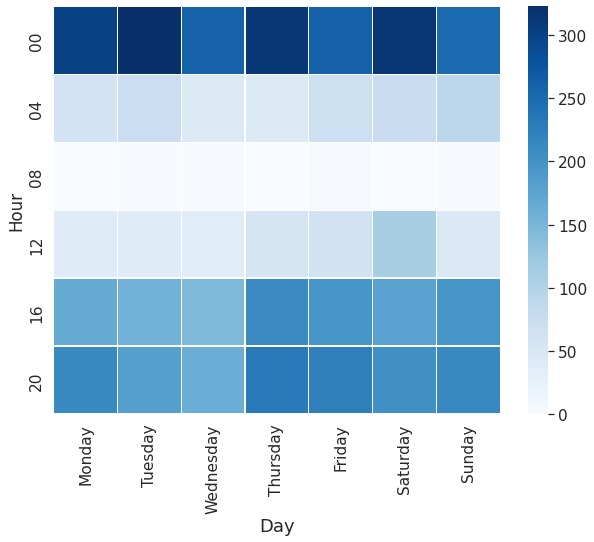

In [64]:
fig = plt.figure(figsize = (10, 7.5))
sns.set(font_scale=1.4)
s = sns.heatmap(df_graf, cmap = "Blues", linewidths=0.1)
s.set_xlabel("Day", fontSize = 18)
s

#### Contabilizar la cantidad de títulos vistos por año, graficar su variación a través de los años.

Creando una columna con los titulos simplificados

In [65]:
df["Simple Title"] = df["Title"].apply(simplifyTitle)

Guardando en un diccionario como keys los años y como valores la cantidad de titulos correspondiente

In [66]:
titulosTotal = df.groupby(["Simple Title", "Year"]).size().reset_index()

añosVistos = ["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]

años_titulos = {}

for i in añosVistos:
  años_titulos[i] = titulosTotal[titulosTotal["Year"] == i][0].count()

años_titulos

{'2015': 81,
 '2016': 39,
 '2017': 78,
 '2018': 52,
 '2019': 45,
 '2020': 29,
 '2021': 26,
 '2022': 11}

Graficando la variación a traves de los años usando el diccionario

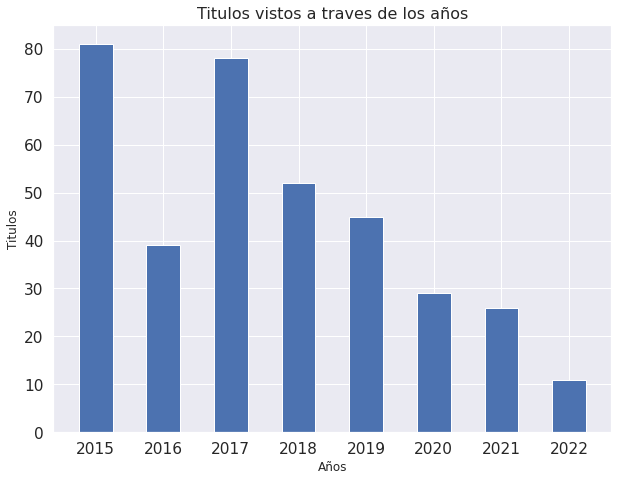

In [67]:
fig = plt.figure(figsize = (10, 7.5))
plt.bar(años_titulos.keys(), años_titulos.values(), width = 0.5)

plt.xlabel("Años", fontSize = 12)
plt.ylabel("Titulos", fontSize = 12)

plt.title("Titulos vistos a traves de los años", fontSize = 16)
plt.show()

#### Total de días de todos los títulos reproducidos.

In [68]:
totalDias = int(df["Duration"].sum() / 60 / 60 / 24)
print("El total de días de todos los títulos reproducidos es " + str(totalDias))

El total de días de todos los títulos reproducidos es 99


#### Bonus

##### Identificar cuál fue la película de Star Wars más veces vista por duración.

In [ ]:
def getStarWarsMovies(input):
  if "Star Wars" in input:
    return input
  else:
    return
star_wars = df_peliculas["Title"].apply(getStarWarsMovies)

star_wars = df[df["Simple Title"] == "Star Wars"][df["Content Type"] == "Pelicula"]
star_wars = star_wars.groupby(["Title", "Duration"]).size().reset_index()
movie_names = star_wars["Title"].unique()
movie_names

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


array(['Star Wars: El Imperio contraataca',
       'Star Wars: El ataque de los clones',
       'Star Wars: El despertar de la fuerza',
       'Star Wars: El regreso del Jedi', 'Star Wars: La amenaza fantasma',
       'Star Wars: La venganza de los Sith',
       'Star Wars: Una nueva esperanza'], dtype=object)

In [ ]:
pelis = df[df["Content Type"] == "Pelicula"]
pelis = pelis[pelis["Sipmle Title"] =0]

## Mostrando el dataframe

In [69]:
original_df = pd.read_csv("NetflixHistory.csv")

In [70]:
df

,Unnamed: 0,Profile Name,Start Time,Duration,Title,Device Type,Bookmark,Latest Bookmark,Content Type,Year,Month,Day,Hour,Simple Title
0,0,Chona,2022-08-21 19:54:53,174,Community: Temporada 3: Teoría del caos correc...,Apple Apple TV 4 Apple TV,00:02:55,00:02:55,Serie,2022,August,Sunday,19,Community
1,1,Chona,2022-08-21 19:33:17,1293,Community: Temporada 3: Ecología competitiva (...,Apple Apple TV 4 Apple TV,00:21:33,00:21:33,Serie,2022,August,Sunday,19,Community
2,2,Chona,2022-08-21 19:11:40,1288,Community: Temporada 3: Geografía del conflict...,Apple Apple TV 4 Apple TV,00:21:28,00:21:28,Serie,2022,August,Sunday,19,Community
3,3,Chona,2022-08-21 18:50:27,1241,Community: Temporada 2: Intermediate Documenta...,Apple Apple TV 4 Apple TV,00:21:02,00:21:02,Serie,2022,August,Sunday,18,Community
4,4,Chona,2022-08-21 18:16:34,1280,Community: Temporada 3: El documental (Capítul...,Apple Apple TV 4 Apple TV,00:21:21,00:21:21,Serie,2022,August,Sunday,18,Community
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12992,12992,Chona,2015-01-08 19:21:21,249,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),Apple TV 3 (revised),00:04:40,Not latest view,Serie,2015,January,Thursday,19,Lost
12993,12993,Chona,2015-01-08 19:20:47,15,Lost: Temporada 1: Nacida para correr (Capítul...,Apple TV 3 (revised),00:00:14,Not latest view,Serie,2015,January,Thursday,19,Lost
12994,12994,Chona,2015-01-08 19:18:32,37,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),Apple TV 3 (revised),00:00:37,Not latest view,Serie,2015,January,Thursday,19,Lost
12995,12995,Chona,2015-01-08 19:16:45,18,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),Apple TV 3 (revised),00:00:18,Not latest view,Serie,2015,January,Thursday,19,Lost
